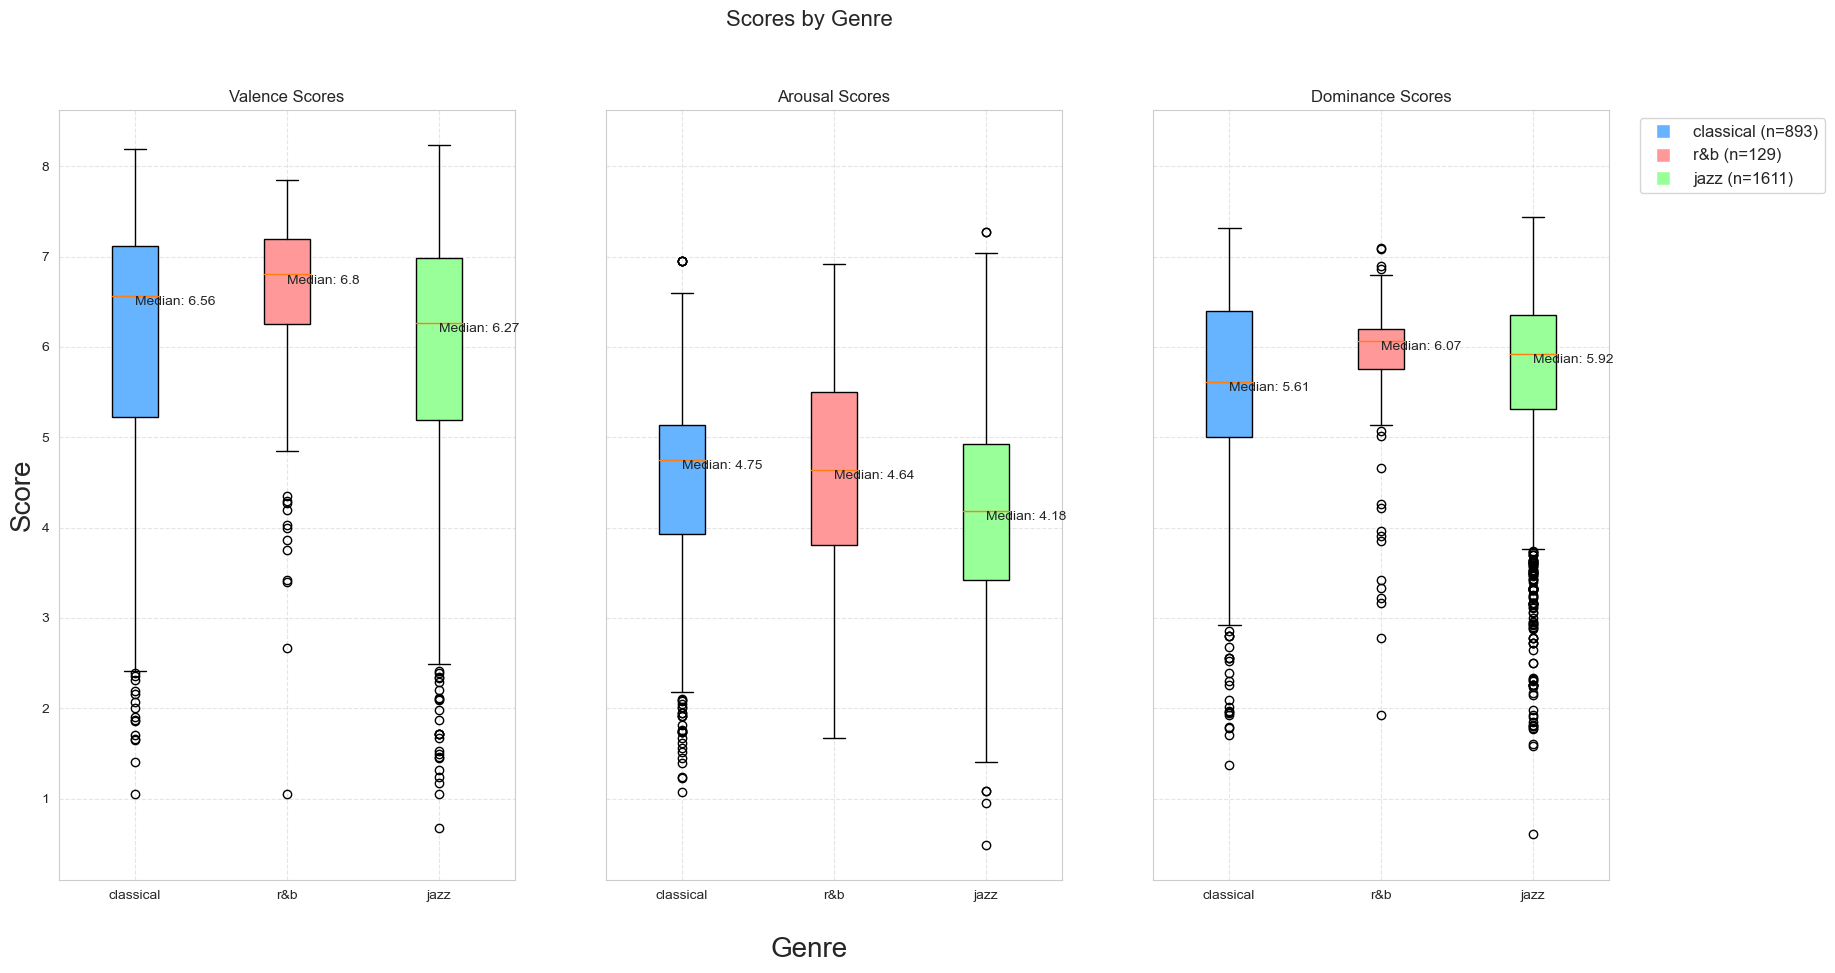

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read the dataset into a pandas dataframe
df = pd.read_csv('muse_v3.csv')

# select the desired genres
desired_genres = ['classical', 'r&b', 'jazz']

# filter the dataframe to include only the rows corresponding to the desired genres
filtered_df = df[df['genre'].isin(desired_genres)]

# create a list of dataframes for each genre
genre_dfs = [filtered_df[filtered_df['genre'] == genre] for genre in desired_genres]

# create the boxplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey = True)
fig.suptitle('Scores by Genre', fontsize=16)

# define colors for each genre (use more distinguishable colors if needed)
colors = ['#66b3ff', '#ff9999', '#99ff99']

# customize the plot appearance
# for ax in axs:
#     ax.grid(True, linestyle='--', alpha=0.5)
#     ax.set_xlabel('Genre', fontsize=12)
#     ax.set_ylabel('Score', fontsize=12)
#     ax.tick_params(axis='both', which='major', labelsize=10)

for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

valence_box = axs[0].boxplot([genre_df['valence_tags'] for genre_df in genre_dfs], labels=desired_genres, patch_artist=True)
axs[0].set_title('Valence Scores')
axs[0].set_ylabel('Score', fontsize = 20)

# set colors for valence boxplots
for patch, color in zip(valence_box['boxes'], colors):
    patch.set_facecolor(color)

# arousal scores
arousal_box = axs[1].boxplot([genre_df['arousal_tags'] for genre_df in genre_dfs], labels=desired_genres, patch_artist=True)
axs[1].set_title('Arousal Scores')


# set colors for arousal boxplots
for patch, color in zip(arousal_box['boxes'], colors):
    patch.set_facecolor(color)

# dominance scores
dominance_box = axs[2].boxplot([genre_df['dominance_tags'] for genre_df in genre_dfs], labels=desired_genres, patch_artist=True)
axs[2].set_title('Dominance Scores')



for patch, color in zip(dominance_box['boxes'], colors):
    patch.set_facecolor(color)

for i, genre_df in enumerate(genre_dfs):
    median_valence = round(genre_df['valence_tags'].median(), 2)
    median_arousal = round(genre_df['arousal_tags'].median(), 2)
    median_dominance = round(genre_df['dominance_tags'].median(), 2)

    axs[0].text(i+1, median_valence-0.1, f'Median: {median_valence}')
    axs[1].text(i+1, median_arousal-0.1, f'Median: {median_arousal}')
    axs[2].text(i+1, median_dominance-0.1, f'Median: {median_dominance}')

    size = len(genre_df)
    label = f'{desired_genres[i]} (n={size})'
    element = plt.Line2D([], [], color='white', label=label, marker='s', markerfacecolor=colors)

# axs[0].set(ylabel='Score', fontsize = 12)
fig.text(0.5, 0.04, 'Genre', ha='center', va='center', fontsize=20)
# update the legend elements
legend_elements = []
for i, genre_df in enumerate(genre_dfs):
    size = len(genre_df)
    label = f'{desired_genres[i]} (n={size})'
    element = plt.Line2D([], [], color='white', label=label, marker='s', markerfacecolor=colors[i], markersize=10)
    legend_elements.append(element)
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Save the figure to a file
plt.savefig('boxplots_by_genre_improved.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#### Figure 1

Boxplots comparing the distribution of valence, arousal, and dominance scores across three musical genres (classical, R&B, and jazz). The colors represent different genres, with blue for classical, red for R&B, and green for jazz. Each boxplot shows the median (solid  horizontal line) and interquartile range (IQR, the box), with whiskers extending to the minimum and maximum values within 1.5 * IQR. Median values are also provided as text above each box